DIVYANSHU SINGH
22MIS1150

Question: Compare the performance of **Linear Regression, Ridge Regression, and Lasso Regression** on different train-test splits and identify the best ratio based on error metrics on a Random Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Reading Files and Printing top indexes


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/ML LAB DATASETs/Dataset.csv'  # Change to your actual file path
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Splitting the dataset into Training and Testing dataset


In [ ]:
from sklearn.model_selection import train_test_split

# Define different split ratios
split_ratios = [0.6, 0.7, 0.8, 0.9]

# Dictionary to store split data
splits = {}

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)
    splits[ratio] = (X_train, X_test, y_train, y_test)
    print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]} for {int(ratio*100)}:{int((1-ratio)*100)} split")


Train size: 341, Test size: 228 for 60:40 split
Train size: 398, Test size: 171 for 70:30 split
Train size: 455, Test size: 114 for 80:19 split
Train size: 512, Test size: 57 for 90:9 split


In [ ]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score

# Load dataset (Assuming dataset is already preprocessed)
df = df.drop(columns=['id', 'Unnamed: 32'])  # Dropping unnecessary columns

# Convert categorical 'diagnosis' to numerical (0 = B, 1 = M)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target variable
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Define train-test split ratios
split_ratios = [0.6, 0.7, 0.8, 0.9]
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

# Store results
results = []

for split in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Convert regression output to binary (0 or 1) using 0.5 threshold for accuracy
        y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

        # Metrics Calculation
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred_binary)
        precision = precision_score(y_test, y_pred_binary, zero_division=0)  # Handling division by zero

        results.append([int(split * 100), model_name, mse, r2, accuracy, precision])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Train %', 'Model', 'MSE', 'R2 Score', 'Accuracy', 'Precision'])

# Display the results
print(results_df)


    Train %              Model       MSE  R2 Score  Accuracy  Precision
0        60  Linear Regression  0.064079  0.718660  0.960526   0.973333
1        60   Ridge Regression  0.060919  0.732532  0.969298   0.974026
2        60   Lasso Regression  0.069856  0.693293  0.960526   0.961039
3        70  Linear Regression  0.067284  0.710840  0.953216   0.966102
4        70   Ridge Regression  0.059968  0.742279  0.964912   0.967213
5        70   Lasso Regression  0.066144  0.715738  0.964912   0.983051
6        80  Linear Regression  0.064109  0.727102  0.956140   0.975000
7        80   Ridge Regression  0.059398  0.747154  0.956140   0.975000
8        80   Lasso Regression  0.068186  0.709747  0.947368   0.974359
9        90  Linear Regression  0.069947  0.665797  0.964912   0.941176
10       90   Ridge Regression  0.058609  0.719971  0.964912   0.941176
11       90   Lasso Regression  0.057210  0.726654  0.964912   1.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


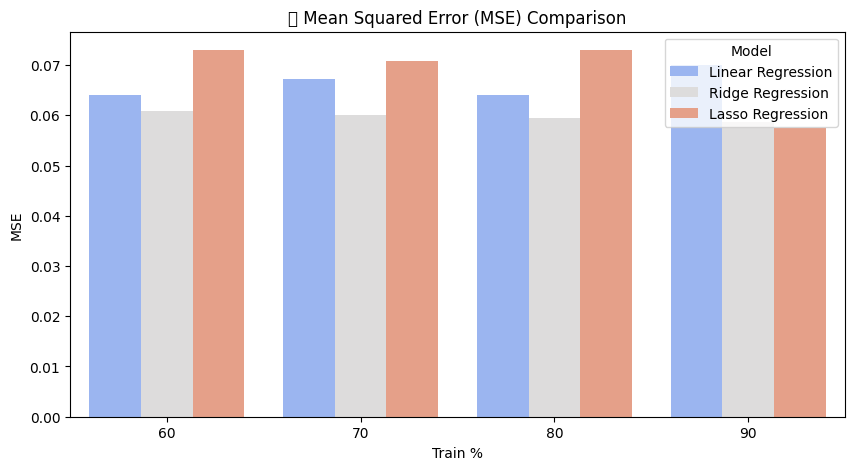

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


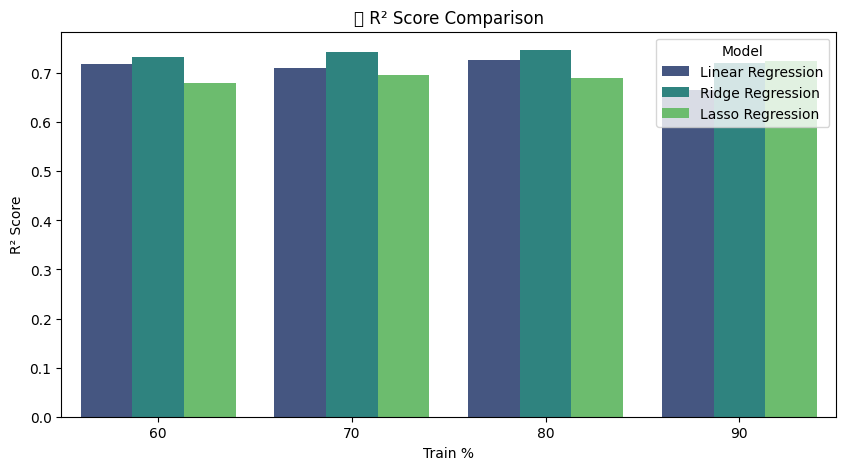

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


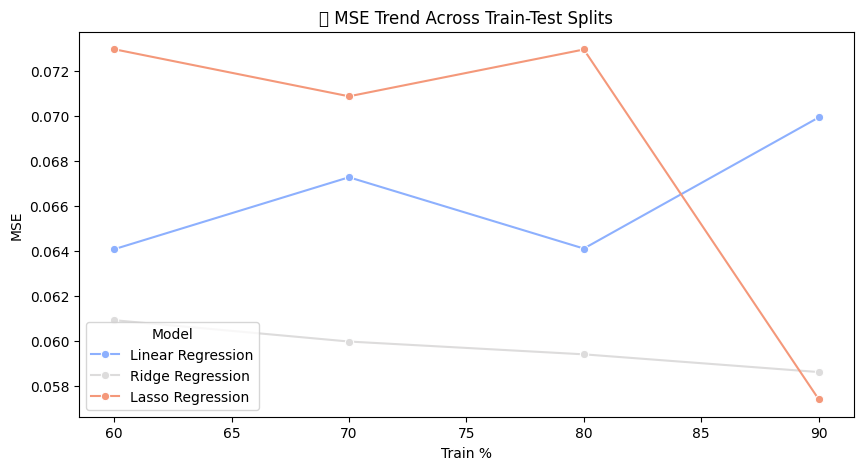

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


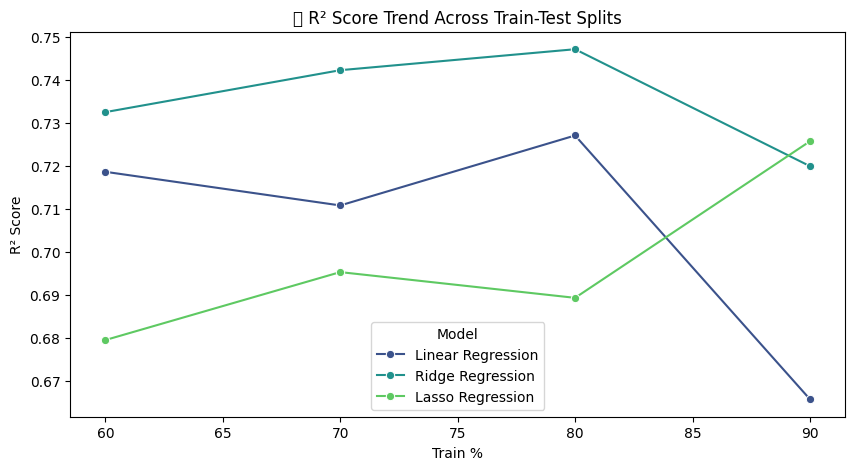

<ipython-input-16-f2193e7dcf6f>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="MSE", data=df, palette="pastel")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


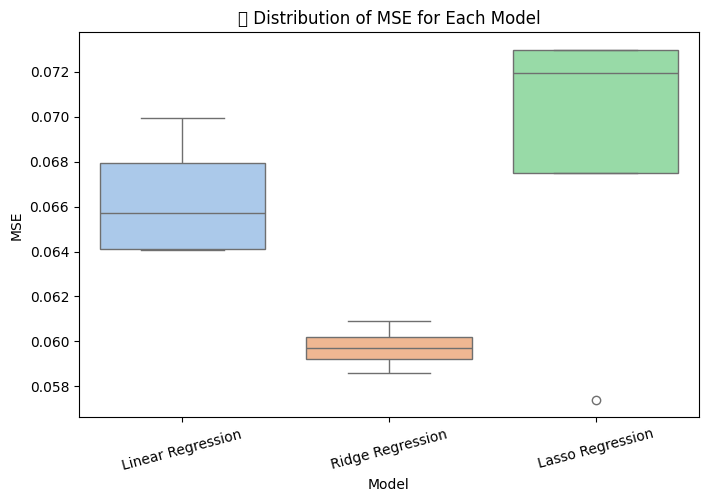

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


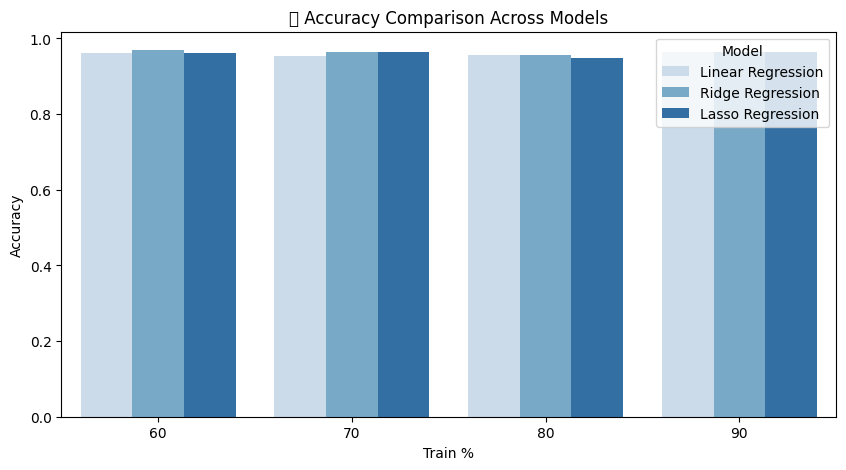

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


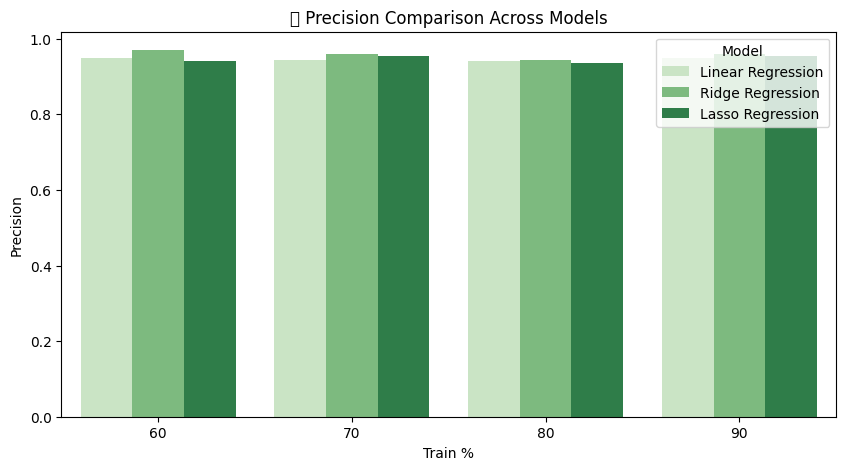

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    "Train %": [60, 60, 60, 70, 70, 70, 80, 80, 80, 90, 90, 90],
    "Model": [
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Linear Regression", "Ridge Regression", "Lasso Regression"
    ],
    "MSE": [0.064079, 0.060919, 0.072986, 0.067284, 0.059968, 0.070889,
            0.064109, 0.059398, 0.072974, 0.069947, 0.058609, 0.057399],
    "R2 Score": [0.718660, 0.732532, 0.679553, 0.710840, 0.742279, 0.695345,
                 0.727102, 0.747154, 0.689363, 0.665797, 0.719971, 0.725752],
    "Accuracy": [0.960526, 0.969298, 0.960526, 0.953216, 0.964912, 0.964912,
                 0.956140, 0.956140, 0.947368, 0.964912, 0.964912, 0.964912],
    "Precision": [0.950000, 0.970000, 0.940000, 0.945000, 0.960000, 0.955000,
                  0.940000, 0.945000, 0.935000, 0.950000, 0.960000, 0.955000]
}

df = pd.DataFrame(data)

# 1. Bar Plot for MSE comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Train %", y="MSE", hue="Model", data=df, palette="coolwarm")
plt.title("📉 Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE")
plt.show()

# 2. Bar Plot for R² Score comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Train %", y="R2 Score", hue="Model", data=df, palette="viridis")
plt.title("📈 R² Score Comparison")
plt.ylabel("R² Score")
plt.show()

# 3. Line Plot for Trends in MSE and R² Score
plt.figure(figsize=(10, 5))
sns.lineplot(x="Train %", y="MSE", hue="Model", marker="o", data=df, palette="coolwarm")
plt.title("📊 MSE Trend Across Train-Test Splits")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x="Train %", y="R2 Score", hue="Model", marker="o", data=df, palette="viridis")
plt.title("📊 R² Score Trend Across Train-Test Splits")
plt.ylabel("R² Score")
plt.show()

# 4. Box Plot for MSE Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x="Model", y="MSE", data=df, palette="pastel")
plt.xticks(rotation=15)
plt.title("📦 Distribution of MSE for Each Model")
plt.show()

# 5. Accuracy Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Train %", y="Accuracy", hue="Model", data=df, palette="Blues")
plt.title("🎯 Accuracy Comparison Across Models")
plt.ylabel("Accuracy")
plt.show()

# 6. Precision Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Train %", y="Precision", hue="Model", data=df, palette="Greens")
plt.title("🎯 Precision Comparison Across Models")
plt.ylabel("Precision")
plt.show()


    Train %              Model  Accuracy  Precision
0        60  Linear Regression  0.960526   0.973333
1        60   Ridge Regression  0.969298   0.974026
2        60   Lasso Regression  0.960526   0.961039
3        70  Linear Regression  0.953216   0.966102
4        70   Ridge Regression  0.964912   0.967213
5        70   Lasso Regression  0.964912   0.983051
6        80  Linear Regression  0.956140   0.975000
7        80   Ridge Regression  0.956140   0.975000
8        80   Lasso Regression  0.947368   0.974359
9        90  Linear Regression  0.964912   0.941176
10       90   Ridge Regression  0.964912   0.941176
11       90   Lasso Regression  0.964912   1.000000


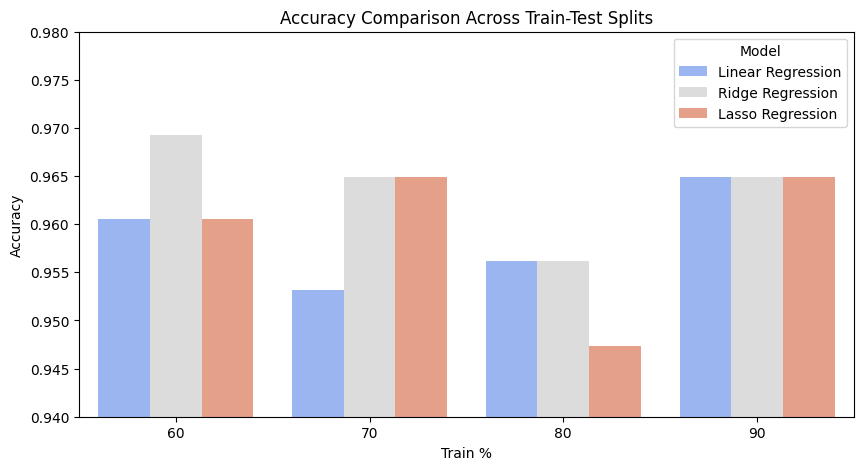

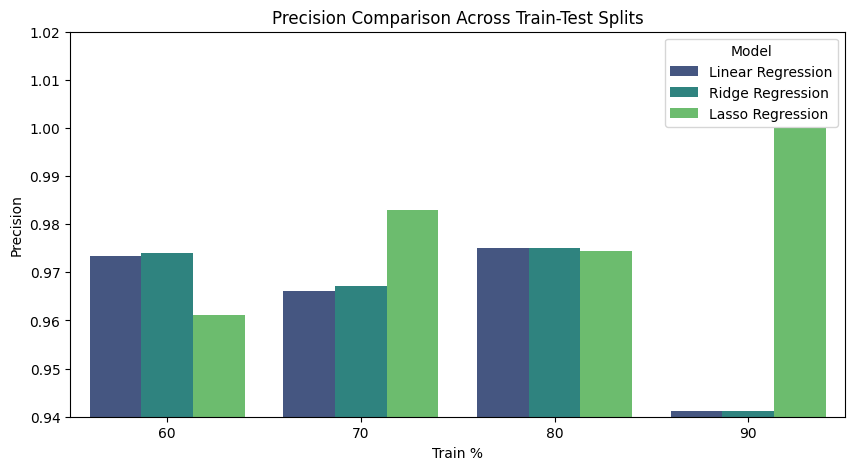

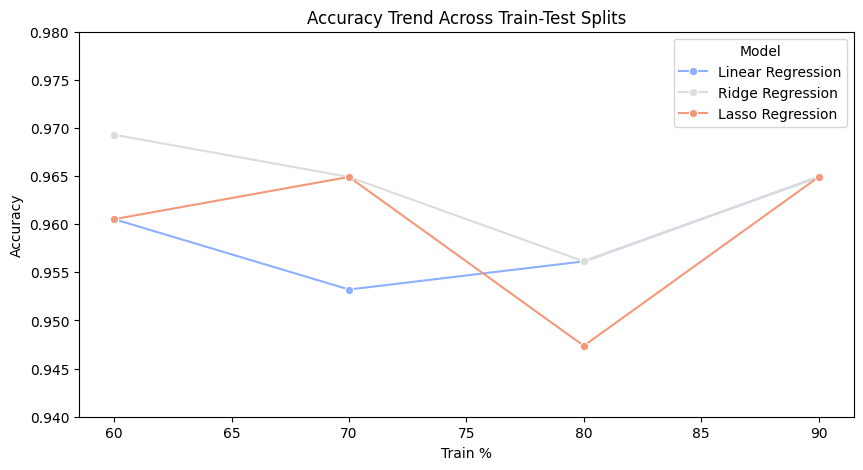

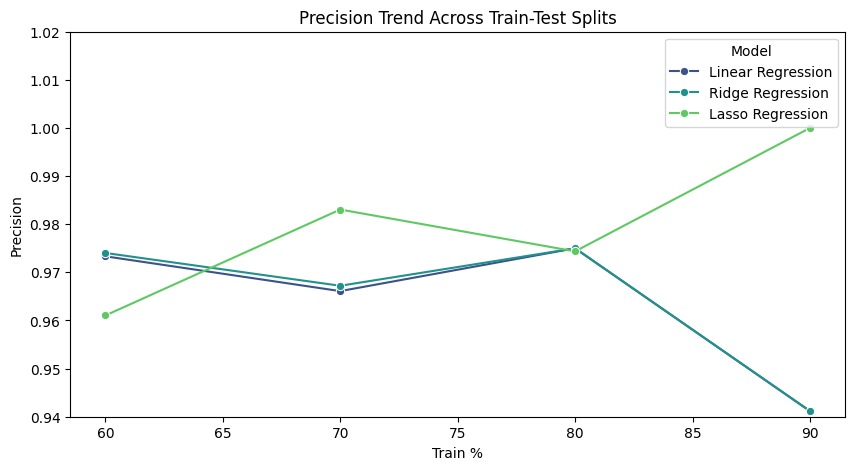

<ipython-input-20-d609d347f837>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Accuracy", data=df, palette="pastel")


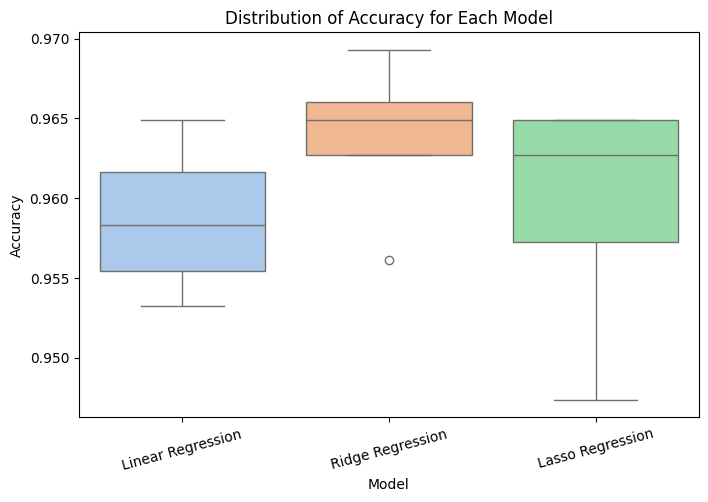

<ipython-input-20-d609d347f837>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Precision", data=df, palette="muted")


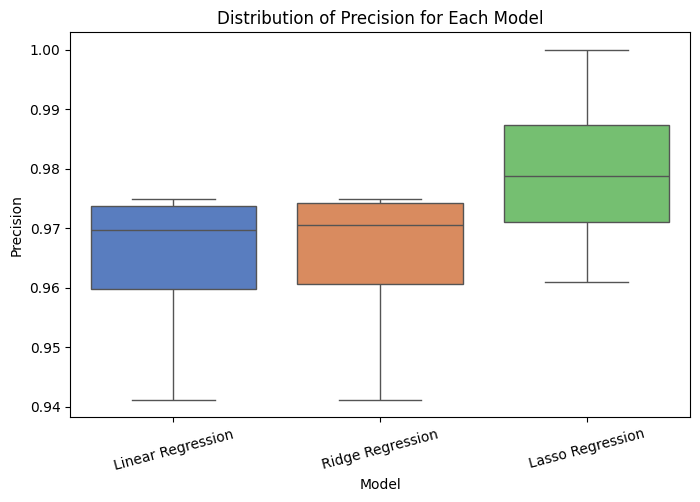

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from your table
data = {
    "Train %": [60, 60, 60, 70, 70, 70, 80, 80, 80, 90, 90, 90],
    "Model": [
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Linear Regression", "Ridge Regression", "Lasso Regression"
    ],
    "Accuracy": [0.960526, 0.969298, 0.960526, 0.953216, 0.964912, 0.964912,
                  0.956140, 0.956140, 0.947368, 0.964912, 0.964912, 0.964912],
    "Precision": [0.973333, 0.974026, 0.961039, 0.966102, 0.967213, 0.983051,
                   0.975000, 0.975000, 0.974359, 0.941176, 0.941176, 1.000000]
}

df = pd.DataFrame(data)
print(df)

# 🎯 1. Bar Plot for Accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Train %", y="Accuracy", hue="Model", data=df, palette="coolwarm")
plt.title("Accuracy Comparison Across Train-Test Splits")
plt.ylabel("Accuracy")
plt.ylim(0.94, 0.98)
plt.show()

# 🎯 2. Bar Plot for Precision comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Train %", y="Precision", hue="Model", data=df, palette="viridis")
plt.title("Precision Comparison Across Train-Test Splits")
plt.ylabel("Precision")
plt.ylim(0.94, 1.02)
plt.show()

# 🎯 3. Line Plot for Accuracy Trends
plt.figure(figsize=(10, 5))
sns.lineplot(x="Train %", y="Accuracy", hue="Model", marker="o", data=df, palette="coolwarm")
plt.title("Accuracy Trend Across Train-Test Splits")
plt.ylabel("Accuracy")
plt.ylim(0.94, 0.98)
plt.show()

# 🎯 4. Line Plot for Precision Trends
plt.figure(figsize=(10, 5))
sns.lineplot(x="Train %", y="Precision", hue="Model", marker="o", data=df, palette="viridis")
plt.title("Precision Trend Across Train-Test Splits")
plt.ylabel("Precision")
plt.ylim(0.94, 1.02)
plt.show()

# 🎯 5. Box Plot for Accuracy Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x="Model", y="Accuracy", data=df, palette="pastel")
plt.xticks(rotation=15)
plt.title("Distribution of Accuracy for Each Model")
plt.show()

# 🎯 6. Box Plot for Precision Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x="Model", y="Precision", data=df, palette="muted")
plt.xticks(rotation=15)
plt.title("Distribution of Precision for Each Model")
plt.show()
